# Coronal Mass Ejections EDA

### Column Information
| Field                   | Meaning                                                                                                                                                                                                                                                                                                                                 |
| ----------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **`activityID`**        | Unique identifier for the CME event. It usually includes the date/time of the initial detection (UTC), the event type (`CME`), and an event counter for that day. Here: `"2025-08-10T02:12:00-CME-001"` means this was the first CME detected on 2025-08-10 at 02:12 UTC.                                                               |
| **`catalog`**           | The database source or classification catalog used. `"M2M_CATALOG"` likely refers to the “Mission to Mars” or “Machine-to-Machine” NASA CME catalog, depending on the pipeline.                                                                                                                                                         |
| **`startTime`**         | UTC timestamp for when the CME was first observed. `"2025-08-10T02:12Z"` is the initial appearance in imagery.                                                                                                                                                                                                                          |
| **`instruments`**       | List of instruments/telescopes that observed the CME. Each has a `"displayName"` showing the spacecraft and instrument: <br>• **SOHO: LASCO/C2** — coronagraph on SOHO spacecraft, close field of view. <br>• **SOHO: LASCO/C3** — coronagraph with a wider view. <br>• **STEREO A: SECCHI/COR2** — coronagraph on STEREO-A spacecraft. |
| **`sourceLocation`**    | Where on the Sun the CME originated, in heliographic coordinates or descriptive terms. Here it’s empty (`""`), meaning location wasn’t determined.                                                                                                                                                                                      |
| **`activeRegionNum`**   | NOAA active region number for the source area. `null` means no associated numbered active region was identified.                                                                                                                                                                                                                        |
| **`note`**              | Human-readable summary of the observation  origin.                                                                                                                                                                                                                 |
| **`submissionTime`**    | UTC time the record was submitted to the DONKI system (`2025-08-11T13:02Z`).                                                                                                                                                                                                                                                            |
| **`versionId`**         | Version number of this record (here `2` means it has been updated once).                                                                                                                                                                                                                                                                |
| **`link`**              | Web URL to the official DONKI page for this CME.                                                                                                                                                                                                                                                                                        |
| **`linkedEvents`**      | List of related space weather events (e.g., flares, SEPs, shocks). `null` means none linked.                                                                                                                                                                                                                                            |
| **`sentNotifications`** | Records of alerts/notifications sent about this event. `null` means no notifications logged.                                                                                                                                                                                                                                            |


#### cmeAnalyses (nested field)
| Field                            | Meaning                                                                                                                 |
| -------------------------------- | ----------------------------------------------------------------------------------------------------------------------- |
| **`isMostAccurate`**             | Boolean — whether this is considered the best available analysis for the CME.                                           |
| **`time21_5`**                   | Time when the CME’s leading edge reached **21.5 solar radii** (important for propagation models).                       |
| **`latitude`**                   | Heliographic latitude (in degrees) of the CME’s central position, negative = south. Here: `-18°` (southern hemisphere). |
| **`longitude`**                  | Heliographic longitude (in degrees), relative to the Earth-Sun line. Positive = west. Here: `95°` west (far side).      |
| **`halfAngle`**                  | Half of the CME’s angular width in degrees. Here `26°` means total width ≈ 52°.                                         |
| **`speed`**                      | Estimated plane-of-sky speed in km/s — here `274 km/s` (a slow CME).                                                    |
| **`type`**                       | CME type classification (e.g., `"S"` for “Single” or “Symmetric”).                                                      |
| **`featureCode`**                | Short code for the CME feature measured (e.g., `"LE"` = Leading Edge).                                                  |
| **`imageType`**                  | Image processing type used — `"running difference"` = subtracts consecutive frames to highlight moving features.        |
| **`measurementTechnique`**       | Technique or tool used — `"SWPC_CAT"` likely refers to NOAA SWPC’s catalog method.                                      |
| **`note`**                       | Analysis notes (e.g., leading edge observed up to 7 solar radii before fading).                                         |
| **`levelOfData`**                | Processing level — `0` typically means raw/primary analysis.                                                            |
| **`tilt`**, **`minorHalfWidth`** | Geometry parameters — here `null` means not measured.                                                                   |
| **`speedMeasuredAtHeight`**      | Height (in solar radii) at which the speed was measured — here `7 R☉`.                                                  |
| **`submissionTime`**             | Time this analysis entry was added to DONKI (`2025-08-10T14:29Z`).                                                      |
| **`link`**                       | Direct URL to the analysis entry in DONKI.                                                                              |


##### enlilList (nested field)
| Field                                                | Meaning                                                                                                                                                                           |
| ---------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **`modelCompletionTime`**                            | When the model finished running.                                                                                                                                                  |
| **`au`**                                             | Model outer boundary distance in Astronomical Units (AU) — here `2 AU` (extends past Mars’ orbit).                                                                                |
| **`estimatedShockArrivalTime`**                      | Predicted shock front arrival at a target — `null` means none predicted.                                                                                                          |
| **`estimatedDuration`**                              | Duration of impact in hours — `null` means not determined.                                                                                                                        |
| **`rmin_re`**                                        | Minimum radial distance in Earth radii — `null` here.                                                                                                                             |
| **`kp_18`**, **`kp_90`**, **`kp_135`**, **`kp_180`** | Predicted geomagnetic storm index (Kp) at different forecast longitudes — all null here (Earth not impacted).                                                                     |
| **`isEarthGB`**                                      | `true` if model predicts a **glancing blow** to Earth — here `false`.                                                                                                             |
| **`isEarthMinorImpact`**                             | `true` if minor impact to Earth predicted — here `false`.                                                                                                                         |
| **`link`**                                           | URL to model run details in DONKI.                                                                                                                                                |
| **`impactList`**                                     | List of predicted impacts to spacecraft/planets. Here: only one — a **glancing blow** to **JUICE** (ESA’s Jupiter Icy Moons Explorer) predicted to arrive on `2025-08-13T12:00Z`. |
| **`cmeIDs`**                                         | List of CME IDs linked to this model run. Here: the same as the top-level `activityID`.                                                                                           |


In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from etl_package import collect_data

In [3]:
from config_package import get_path
json_data = get_path.get_json_data_path('cme')

In [4]:
# open json file and read data
with open(json_data, 'r') as file:
    json_data = json.load(file)

In [5]:
# get dataframe from json data- also apply basic cleaning and transformations
df = collect_data.get_dataframe(type='CME', data=json_data)

## Basic Analysis

In [6]:
df.head()

,activityID,catalog,startTime,instruments,sourceLocation,activeRegionNum,note_x,submissionTime_x,versionId,link_x,...,enlil.kp_18,enlil.kp_90,enlil.kp_135,enlil.kp_180,enlil.isEarthGB,enlil.isEarthMinorImpact,enlil.link,enlil.impactList,enlil.cmeIDs,enlilList_y
0,2015-01-01T08:24:00-CME-001,M2M_CATALOG,2015-01-01T08:24Z,"[{'displayName': 'SOHO: LASCO/C2'}, {'displayN...",,NaN,"Eruption visible in SDO 193, starting ~ 2014-1...",2015-01-02T04:13Z,2,https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...,...,NaN,NaN,NaN,NaN,True,False,https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...,None,[2015-01-01T08:24:00-CME-001],NaN
1,2015-01-02T14:36:00-CME-001,M2M_CATALOG,2015-01-02T14:36Z,"[{'displayName': 'SOHO: LASCO/C2'}, {'displayN...",S07W40,NaN,Associated with a very gradual eruption in a s...,2015-01-03T07:58Z,2,https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...,...,NaN,NaN,NaN,NaN,True,False,https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...,None,[2015-01-02T14:36:00-CME-001],NaN
2,2015-01-03T03:24:00-CME-001,M2M_CATALOG,2015-01-03T03:24Z,"[{'displayName': 'SOHO: LASCO/C2'}, {'displayN...",,NaN,,2015-01-04T01:59Z,1,https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-06T18:24:00-CME-001,M2M_CATALOG,2015-01-06T18:24Z,"[{'displayName': 'SOHO: LASCO/C2'}, {'displayN...",,NaN,No source region could be found in SDO.,2015-01-07T05:10Z,1,https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...,...,NaN,NaN,NaN,NaN,False,False,https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...,None,[2015-01-06T18:24:00-CME-001],NaN
4,2015-01-07T16:24:00-CME-001,M2M_CATALOG,2015-01-07T16:24Z,"[{'displayName': 'SOHO: LASCO/C2'}, {'displayN...",,NaN,SDO 193 shows indication of an eruption off th...,2015-01-08T17:38Z,1,https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.columns

Index(['activityID', 'catalog', 'startTime', 'instruments', 'sourceLocation',
       'activeRegionNum', 'note_x', 'submissionTime_x', 'versionId', 'link_x',
       'cmeAnalyses_x', 'linkedEvents', 'sentNotifications', 'isMostAccurate',
       'time21_5', 'latitude', 'longitude', 'halfAngle', 'speed', 'type',
       'featureCode', 'imageType', 'measurementTechnique', 'note_y',
       'levelOfData', 'tilt', 'minorHalfWidth', 'speedMeasuredAtHeight',
       'submissionTime_y', 'link_y', 'enlilList_x', 'cmeAnalyses_y',
       'enlil.modelCompletionTime', 'enlil.au',
       'enlil.estimatedShockArrivalTime', 'enlil.estimatedDuration',
       'enlil.rmin_re', 'enlil.kp_18', 'enlil.kp_90', 'enlil.kp_135',
       'enlil.kp_180', 'enlil.isEarthGB', 'enlil.isEarthMinorImpact',
       'enlil.link', 'enlil.impactList', 'enlil.cmeIDs', 'enlilList_y'],
      dtype='object')

In [8]:
# drop unnecesary columns
df = df.drop(['enlilList_x', 'enlilList_y', 'cmeAnalyses_x', 'cmeAnalyses_y'], axis=1)

In [9]:
# rename merged columns for clarity
df = df.rename(columns={'submissionTime_x':'submissionTime', 'submissionTime_y': 'cme.submissionTime',
                    'link_x':'link', 'link_y':'cme.link',
                    'note_x':'note', 'note_y':'cme.note' })

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5583 entries, 0 to 5582
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   activityID                       5583 non-null   object 
 1   catalog                          5583 non-null   object 
 2   startTime                        5583 non-null   object 
 3   instruments                      5583 non-null   object 
 4   sourceLocation                   5583 non-null   object 
 5   activeRegionNum                  1252 non-null   float64
 6   note                             5583 non-null   object 
 7   submissionTime                   5583 non-null   object 
 8   versionId                        5583 non-null   int64  
 9   link                             5583 non-null   object 
 10  linkedEvents                     1077 non-null   object 
 11  sentNotifications                1067 non-null   object 
 12  isMostAccurate      

In [11]:
df.shape

(5583, 43)

In [12]:
df.describe()

,activeRegionNum,versionId,latitude,longitude,halfAngle,speed,levelOfData,tilt,minorHalfWidth,speedMeasuredAtHeight,enlil.au,enlil.estimatedDuration,enlil.rmin_re,enlil.kp_18,enlil.kp_90,enlil.kp_135,enlil.kp_180
count,1252.000000,5583.000000,5576.000000,4790.000000,5583.000000,5583.000000,5583.000000,0.0,1.0,2958.000000,2825.000000,247.000000,245.000000,0.0,539.000000,536.000000,539.000000
mean,13208.820288,1.385635,-2.689778,2.242088,25.853573,512.226065,0.114096,NaN,31.0,11.328496,2.006195,29.947368,5.992245,NaN,3.072356,4.292910,4.723562
std,457.161851,0.765000,31.651145,93.519101,10.741207,275.003907,0.328488,NaN,NaN,4.740316,0.147142,31.943955,0.563418,NaN,1.257083,1.507001,1.536308
min,11259.000000,1.000000,-90.000000,-180.000000,2.000000,80.000000,0.000000,NaN,31.0,0.000000,2.000000,8.000000,4.500000,NaN,1.000000,2.000000,2.000000
25%,12863.500000,1.000000,-24.000000,-85.000000,17.000000,328.500000,0.000000,NaN,31.0,7.900000,2.000000,20.000000,5.600000,NaN,2.000000,3.000000,4.000000
50%,13212.000000,1.000000,-2.000000,7.000000,25.000000,443.000000,0.000000,NaN,31.0,10.500000,2.000000,23.800000,6.100000,NaN,3.000000,4.000000,4.000000
75%,13632.500000,2.000000,18.000000,88.000000,33.000000,614.000000,0.000000,NaN,31.0,14.000000,2.000000,27.750000,6.400000,NaN,4.000000,5.000000,6.000000
max,13939.000000,9.000000,90.000000,180.000000,75.000000,3529.000000,2.000000,NaN,31.0,41.000000,5.500000,249.400000,7.100000,NaN,8.000000,9.000000,9.000000


## Null Values


In [13]:
df = df.dropna(axis=1, how='all') # axis1 implies removal of columns (not rows), 'all'- removes columns where all values are null
df.shape

(5583, 41)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5583 entries, 0 to 5582
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   activityID                       5583 non-null   object 
 1   catalog                          5583 non-null   object 
 2   startTime                        5583 non-null   object 
 3   instruments                      5583 non-null   object 
 4   sourceLocation                   5583 non-null   object 
 5   activeRegionNum                  1252 non-null   float64
 6   note                             5583 non-null   object 
 7   submissionTime                   5583 non-null   object 
 8   versionId                        5583 non-null   int64  
 9   link                             5583 non-null   object 
 10  linkedEvents                     1077 non-null   object 
 11  sentNotifications                1067 non-null   object 
 12  isMostAccurate      

In [15]:
# get null percentage of all columns
null_percent = (df.isnull().sum() / len(df)) * 100
null_percent

activityID                          0.000000
catalog                             0.000000
startTime                           0.000000
instruments                         0.000000
sourceLocation                      0.000000
activeRegionNum                    77.574781
note                                0.000000
submissionTime                      0.000000
versionId                           0.000000
link                                0.000000
linkedEvents                       80.709296
sentNotifications                  80.888411
isMostAccurate                      0.000000
time21_5                            0.035823
latitude                            0.125381
longitude                          14.203833
halfAngle                           0.000000
speed                               0.000000
type                                0.000000
featureCode                         0.000000
imageType                          19.469819
measurementTechnique                0.000000
cme.note  

In [16]:
# if null percent > 50, drop the columns
columns_to_drop = null_percent[null_percent >= 50].index
columns_to_drop = columns_to_drop.drop(['linkedEvents', 'sentNotifications']) # these columns are useful for finding correlations/connections
columns_to_drop

Index(['activeRegionNum', 'minorHalfWidth', 'enlil.estimatedShockArrivalTime',
       'enlil.estimatedDuration', 'enlil.rmin_re', 'enlil.kp_90',
       'enlil.kp_135', 'enlil.kp_180', 'enlil.impactList'],
      dtype='object')

In [17]:
df = df.drop(columns=columns_to_drop)
df.shape

(5583, 32)

In [18]:
df.head()

,activityID,catalog,startTime,instruments,sourceLocation,note,submissionTime,versionId,link,linkedEvents,...,levelOfData,speedMeasuredAtHeight,cme.submissionTime,cme.link,enlil.modelCompletionTime,enlil.au,enlil.isEarthGB,enlil.isEarthMinorImpact,enlil.link,enlil.cmeIDs
0,2015-01-01T08:24:00-CME-001,M2M_CATALOG,2015-01-01T08:24Z,"[{'displayName': 'SOHO: LASCO/C2'}, {'displayN...",,"Eruption visible in SDO 193, starting ~ 2014-1...",2015-01-02T04:13Z,2,https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...,None,...,0.0,NaN,2015-01-02T03:59Z,https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...,2015-01-02T04:24Z,2.0,True,False,https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...,[2015-01-01T08:24:00-CME-001]
1,2015-01-02T14:36:00-CME-001,M2M_CATALOG,2015-01-02T14:36Z,"[{'displayName': 'SOHO: LASCO/C2'}, {'displayN...",S07W40,Associated with a very gradual eruption in a s...,2015-01-03T07:58Z,2,https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...,[{'activityID': '2015-01-07T05:24:00-IPS-001'}],...,0.0,NaN,2015-01-03T08:33Z,https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...,2015-01-03T08:14Z,2.0,True,False,https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...,[2015-01-02T14:36:00-CME-001]
2,2015-01-03T03:24:00-CME-001,M2M_CATALOG,2015-01-03T03:24Z,"[{'displayName': 'SOHO: LASCO/C2'}, {'displayN...",,,2015-01-04T01:59Z,1,https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...,None,...,0.0,NaN,2015-01-04T02:00Z,https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-06T18:24:00-CME-001,M2M_CATALOG,2015-01-06T18:24Z,"[{'displayName': 'SOHO: LASCO/C2'}, {'displayN...",,No source region could be found in SDO.,2015-01-07T05:10Z,1,https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...,None,...,0.0,NaN,2015-01-07T05:10Z,https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...,2015-01-07T05:43Z,2.0,False,False,https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...,[2015-01-06T18:24:00-CME-001]
4,2015-01-07T16:24:00-CME-001,M2M_CATALOG,2015-01-07T16:24Z,"[{'displayName': 'SOHO: LASCO/C2'}, {'displayN...",,SDO 193 shows indication of an eruption off th...,2015-01-08T17:38Z,1,https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...,None,...,0.0,NaN,2015-01-08T17:40Z,https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
columns = list(df.columns)
for col in columns:
    # converting NaN to None in every column for easier analysis
    df[col] = df[col].where(pd.notna(df[col]), None) 

## Cleaning and Pre-processing

In [20]:
# creating time, and date detected features 
df['date_detected'] = df['activityID'].apply(lambda x: x.split('T')[0]) 
df['time_detected'] = df['activityID'].apply(lambda x: x.split('T')[1]) 
df['date_detected'].head()

0    2015-01-01
1    2015-01-02
2    2015-01-03
3    2015-01-06
4    2015-01-07
Name: date_detected, dtype: object

In [39]:
df['time_detected'] = df['time_detected'].apply(lambda x: x.replace('-CME-001', ''))
df['time_detected'].head()

AttributeError: 'Timedelta' object has no attribute 'replace'

### Data Types

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5583 entries, 0 to 5582
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   activityID                 5583 non-null   object 
 1   catalog                    5583 non-null   object 
 2   startTime                  5583 non-null   object 
 3   instruments                5583 non-null   object 
 4   sourceLocation             5583 non-null   object 
 5   note                       5583 non-null   object 
 6   submissionTime             5583 non-null   object 
 7   versionId                  5583 non-null   int64  
 8   link                       5583 non-null   object 
 9   linkedEvents               1077 non-null   object 
 10  sentNotifications          1067 non-null   object 
 11  isMostAccurate             5583 non-null   object 
 12  time21_5                   5581 non-null   object 
 13  latitude                   5576 non-null   float

In [23]:
# sifting categorical cols
categorical = df.select_dtypes(include='object').columns.tolist() # getting list of columns ahving dtype as object

In [24]:
df[categorical].head()

,activityID,catalog,startTime,instruments,sourceLocation,note,submissionTime,link,linkedEvents,sentNotifications,...,cme.note,cme.submissionTime,cme.link,enlil.modelCompletionTime,enlil.isEarthGB,enlil.isEarthMinorImpact,enlil.link,enlil.cmeIDs,date_detected,time_detected
0,2015-01-01T08:24:00-CME-001,M2M_CATALOG,2015-01-01T08:24Z,"[{'displayName': 'SOHO: LASCO/C2'}, {'displayN...",,"Eruption visible in SDO 193, starting ~ 2014-1...",2015-01-02T04:13Z,https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...,None,None,...,using both SWPC_cat and STEREO_cat with approx...,2015-01-02T03:59Z,https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...,2015-01-02T04:24Z,True,False,https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...,[2015-01-01T08:24:00-CME-001],2015-01-01,08:24:00
1,2015-01-02T14:36:00-CME-001,M2M_CATALOG,2015-01-02T14:36Z,"[{'displayName': 'SOHO: LASCO/C2'}, {'displayN...",S07W40,Associated with a very gradual eruption in a s...,2015-01-03T07:58Z,https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...,[{'activityID': '2015-01-07T05:24:00-IPS-001'}],None,...,Reanalyzed with more C2 and STEREOA imagery,2015-01-03T08:33Z,https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...,2015-01-03T08:14Z,True,False,https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...,[2015-01-02T14:36:00-CME-001],2015-01-02,14:36:00
2,2015-01-03T03:24:00-CME-001,M2M_CATALOG,2015-01-03T03:24Z,"[{'displayName': 'SOHO: LASCO/C2'}, {'displayN...",,,2015-01-04T01:59Z,https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...,None,None,...,Source region could not be found. It's possibl...,2015-01-04T02:00Z,https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...,None,None,None,None,None,2015-01-03,03:24:00
3,2015-01-06T18:24:00-CME-001,M2M_CATALOG,2015-01-06T18:24Z,"[{'displayName': 'SOHO: LASCO/C2'}, {'displayN...",,No source region could be found in SDO.,2015-01-07T05:10Z,https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...,None,None,...,,2015-01-07T05:10Z,https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...,2015-01-07T05:43Z,False,False,https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...,[2015-01-06T18:24:00-CME-001],2015-01-06,18:24:00
4,2015-01-07T16:24:00-CME-001,M2M_CATALOG,2015-01-07T16:24Z,"[{'displayName': 'SOHO: LASCO/C2'}, {'displayN...",,SDO 193 shows indication of an eruption off th...,2015-01-08T17:38Z,https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...,None,None,...,,2015-01-08T17:40Z,https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...,None,None,None,None,None,2015-01-07,16:24:00


In [40]:
# sifting numerical cols
numerical = df.select_dtypes(include=['int', float]).columns.tolist()

In [41]:
df[numerical].head()

,versionId,latitude,longitude,halfAngle,speed,levelOfData,speedMeasuredAtHeight,enlil.au
0,2,31.0,26.0,32.0,350.0,0.0,NaN,2.0
1,2,3.0,34.0,23.0,353.0,0.0,NaN,2.0
2,1,-49.0,-82.0,42.0,210.0,0.0,NaN,NaN
3,1,9.0,39.0,12.0,532.0,0.0,NaN,2.0
4,1,67.0,-102.0,20.0,579.0,0.0,NaN,NaN


In [27]:
df['activityID'].head()

0    2015-01-01T08:24:00-CME-001
1    2015-01-02T14:36:00-CME-001
2    2015-01-03T03:24:00-CME-001
3    2015-01-06T18:24:00-CME-001
4    2015-01-07T16:24:00-CME-001
Name: activityID, dtype: object

In [28]:
# new datetime column from activityID
df['datetime_detected'] = df['activityID'].apply(lambda x: x.replace('-CME-001', ''))

In [29]:
# manually sifting datetime cols
datetime = ['datetime_detected', 'date_detected', 'startTime', 'submissionTime', 'cme.submissionTime', 'enlil.modelCompletionTime', 'time21_5']

In [30]:
# explicitly convert to datetime
for col in datetime:
    df[col] = pd.to_datetime(df[col], utc=True, errors='coerce')

df['time_detected'] = pd.to_timedelta(df['time_detected'], errors='coerce') # timedelta seperately
datetime.append('time_detected')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5583 entries, 0 to 5582
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   activityID                 5583 non-null   object             
 1   catalog                    5583 non-null   object             
 2   startTime                  5583 non-null   datetime64[ns, UTC]
 3   instruments                5583 non-null   object             
 4   sourceLocation             5583 non-null   object             
 5   note                       5583 non-null   object             
 6   submissionTime             5583 non-null   datetime64[ns, UTC]
 7   versionId                  5583 non-null   int64              
 8   link                       5583 non-null   object             
 9   linkedEvents               1077 non-null   object             
 10  sentNotifications          1067 non-null   object             
 11  isMo

## Univariate Analysis

### Numerical Univariate

In [32]:
def num_uni(col):
    _, axes = plt.subplots(1, 2, figsize=(12, 5))

    sns.histplot(data=df, x=col, ax=axes[0], kde=True)
    axes[0].set_title(f'Histogram of {col}', fontsize=12)

    sns.boxplot(data=df, x=col, ax=axes[1])
    axes[1].set_title(f'Boxplot of {col}', fontsize=12)
    
    plt.tight_layout()
    plt.show()

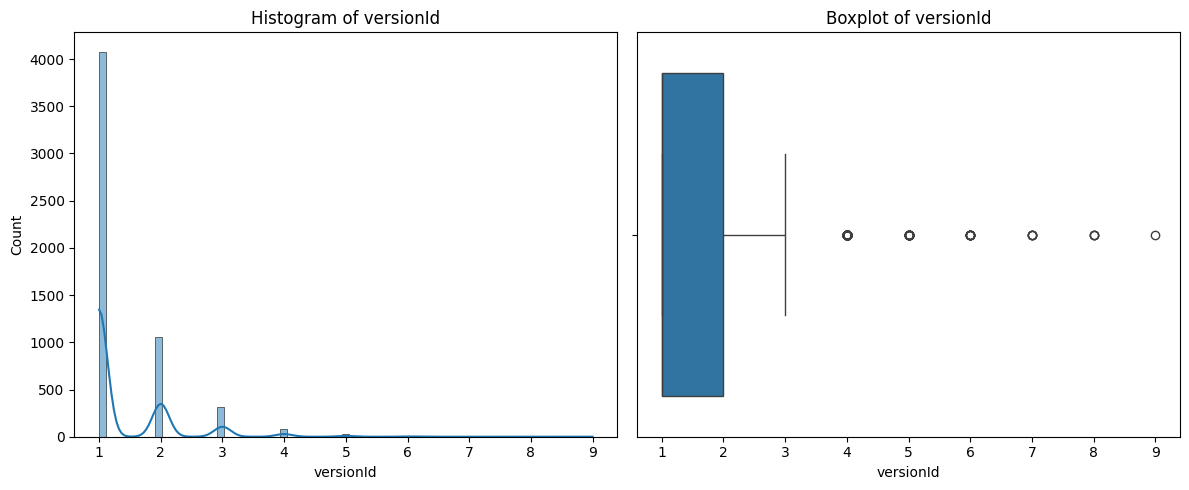

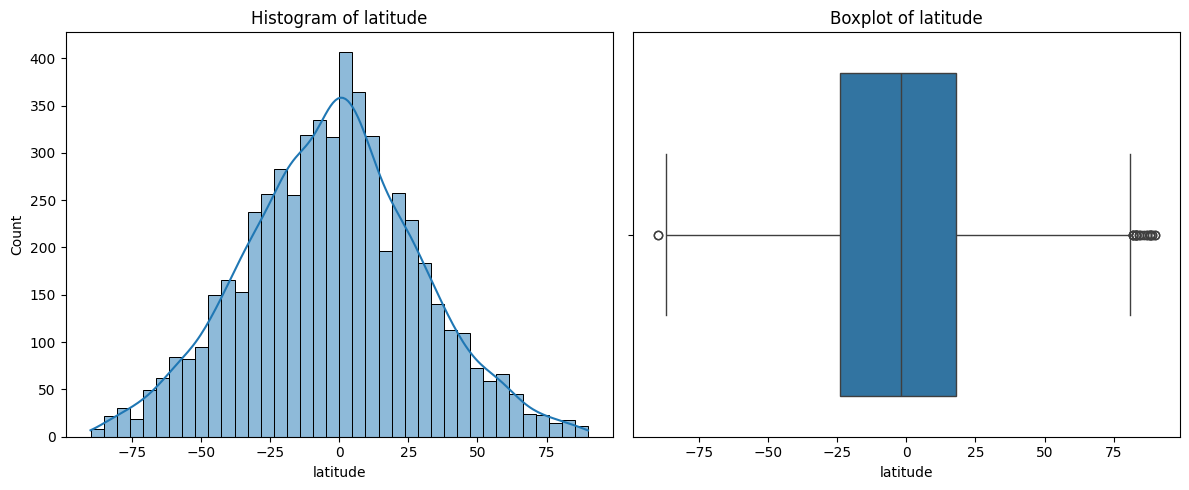

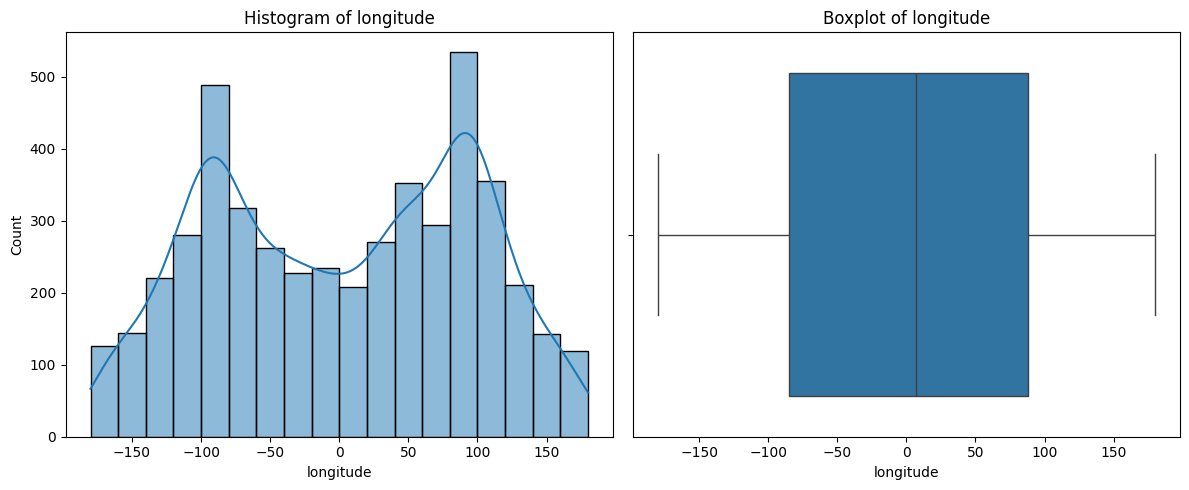

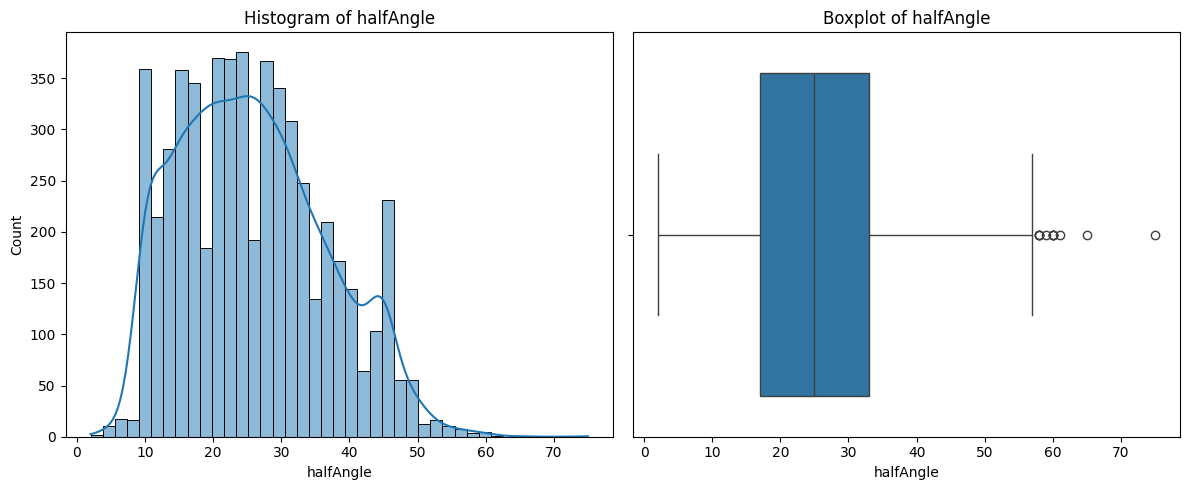

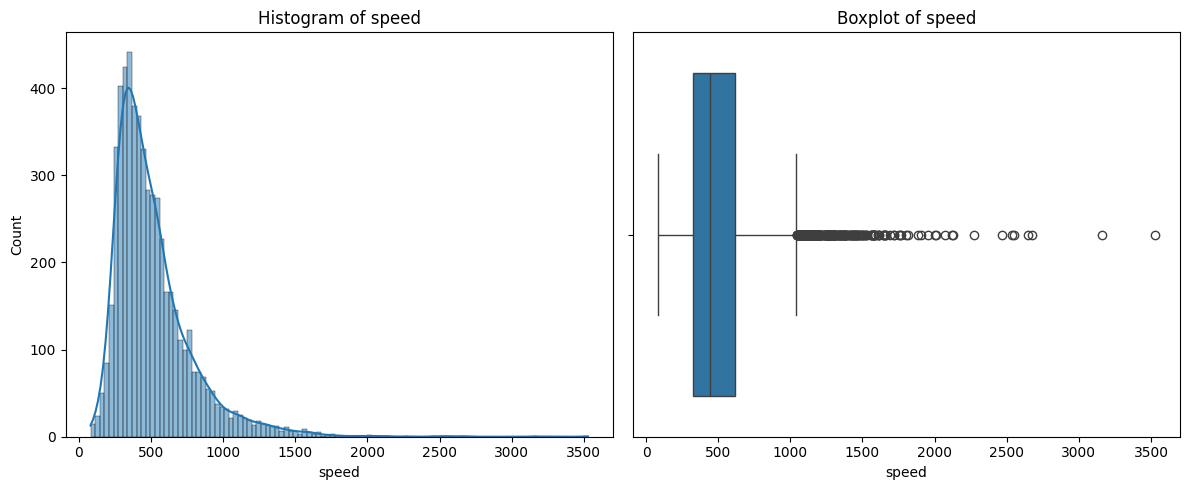

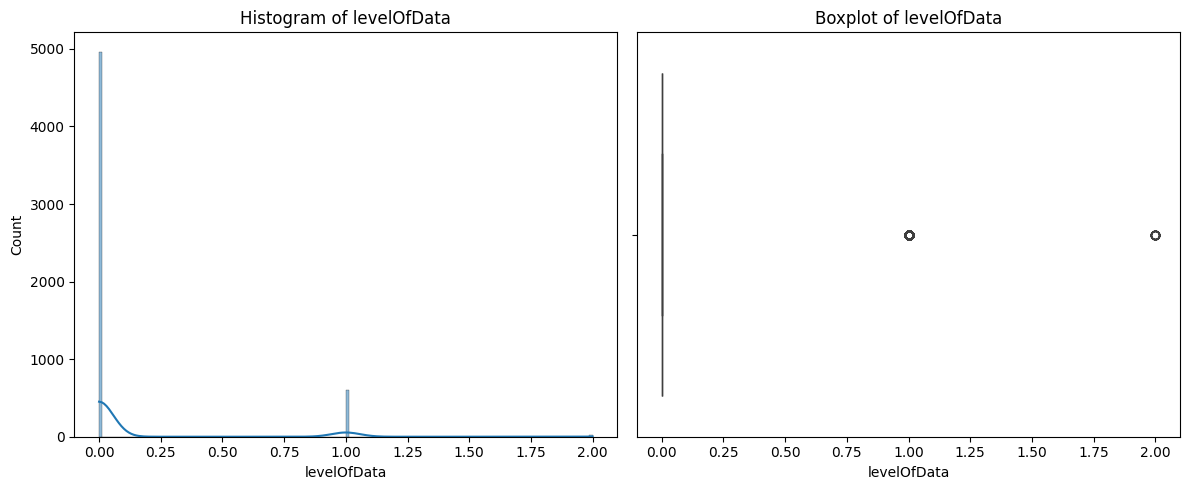

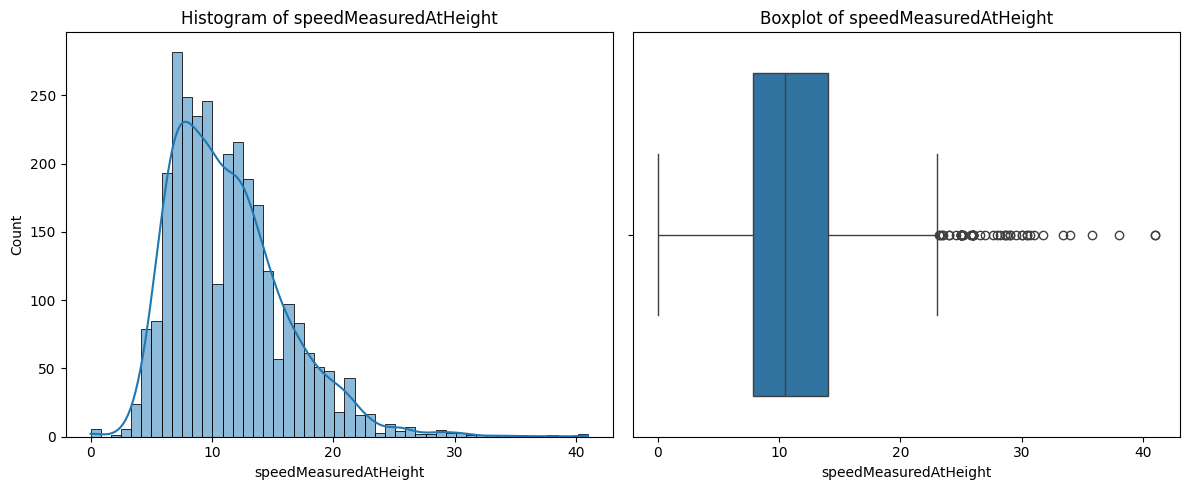

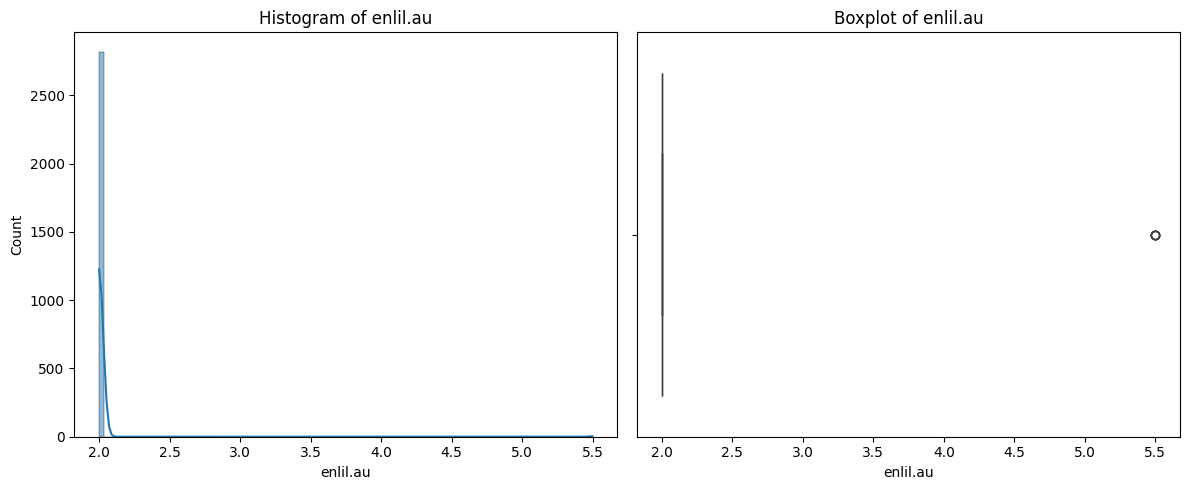

In [42]:
for col in numerical:
    num_uni(col)

#### Insights

1. latitude
    - Measures how far north or south a feature (like a sunspot or solar flare) is from the Sun’s equator
    - Ranges from –90° to +90°
        - normal distribution with little outliers
        - most of the CMEs found are near the Earth's equator (0 degrees)
2. longitude
    - Measures the position east or west relative to a reference point on the Sun’s surface.
    - Range from –180° to +180° 
        - bimodel distribution having 2 peaks
        - suggests that some regions are more prone to CMEs than others (regions near -100 and +100 longitude)
3. halfAngle 
    - tells the half angular width of CME- higher the angle, higher the chance of it being Earth-directed
        - slightly right skewed distribution
4. speed 
    - tells plane-of-sky(2D) speed in km/sec
    - is mostly less than actual speed of CME
        - highly right skewed distribution shows most CMEs have POS speeds near 500km/s
        - but there are plenty of high speed CMEs acting as outliers
5. levelOfData 
    - how processed is the data
        - has only 3 values (0, 1, 2) _therefore should be categorical_
        - 0 has significantly higher frequency- therefore most of the data is raw / not processed 
6. speedMeasuerdAtHeight
    - height at which CME is measured
        - right skewed distribution
        - ranges from 0-40 solar radii
        - most of the CME measured at 5 to 15 solar radii
7. enlil.au
    - enlil model outer boundary distance (adjusted based on requirements)
    - takes value from 1 to 10 (int)
        - has only 2 values (2, 5) _therefor should be categorical_
        - most values have au=2 - common setup for CME simulation
        - 5AU used for Ulysses spacecraft specifically
8. versionID 
    - how many times the data has been updated - categorical
        - majority of data hasnt been updated (version = 1)
        - however there are exceptions

In [ ]:
# change data types accordingly
numerical.remove('levelOfData')
numerical.remove('enlil.au')

categorical.extend(['levelOfData', 'enlil.au'])
print(numerical, categorical)

['latitude', 'longitude', 'halfAngle', 'speed', 'speedMeasuredAtHeight'] ['activityID', 'catalog', 'startTime', 'instruments', 'sourceLocation', 'note', 'submissionTime', 'link', 'linkedEvents', 'sentNotifications', 'isMostAccurate', 'time21_5', 'type', 'featureCode', 'imageType', 'measurementTechnique', 'cme.note', 'cme.submissionTime', 'cme.link', 'enlil.modelCompletionTime', 'enlil.isEarthGB', 'enlil.isEarthMinorImpact', 'enlil.link', 'enlil.cmeIDs', 'date_detected', 'time_detected', 'levelOfData', 'enlil.au']


### Categorical Univariate

- categorical columns contain data having list of dictionaries which needs to be cleaned seperately for analysis.
- for now these columns are excluded

In [35]:
categorical

['activityID',
 'catalog',
 'startTime',
 'instruments',
 'sourceLocation',
 'note',
 'submissionTime',
 'link',
 'linkedEvents',
 'sentNotifications',
 'isMostAccurate',
 'time21_5',
 'type',
 'featureCode',
 'imageType',
 'measurementTechnique',
 'cme.note',
 'cme.submissionTime',
 'cme.link',
 'enlil.modelCompletionTime',
 'enlil.isEarthGB',
 'enlil.isEarthMinorImpact',
 'enlil.link',
 'enlil.cmeIDs',
 'date_detected',
 'time_detected',
 'levelOfData',
 'enlil.au']

In [36]:
exclude = ['activityID', 'instruments', 'link', 'linkedEvents', 'sentNotifications', 'enlil.link', 'cme.link', 'enlil.impactList', 'enlil.cmeIDs', 'measurementTechnique', 'note', 'cme.note', 'cme.link']
categorical_plt = [col for col in categorical if col not in exclude and col not in datetime] # remove datetime and nested columns
df[categorical_plt].head()

,catalog,sourceLocation,isMostAccurate,type,featureCode,imageType,enlil.isEarthGB,enlil.isEarthMinorImpact,levelOfData,enlil.au
0,M2M_CATALOG,,True,S,null,None,True,False,0.0,2.0
1,M2M_CATALOG,S07W40,True,S,null,None,True,False,0.0,2.0
2,M2M_CATALOG,,True,S,null,None,None,None,0.0,NaN
3,M2M_CATALOG,,True,C,null,None,False,False,0.0,2.0
4,M2M_CATALOG,,True,C,null,None,None,None,0.0,NaN


In [37]:
def cat_uni(col):
    # make count plot only if unique values are less than 100
    if df[col].nunique() <= 100:
        sns.countplot(df[col])
        plt.title(f'Countplot of {col}')
        plt.show()

    print(df[col].value_counts())
    print('-------------------------------------------------------')

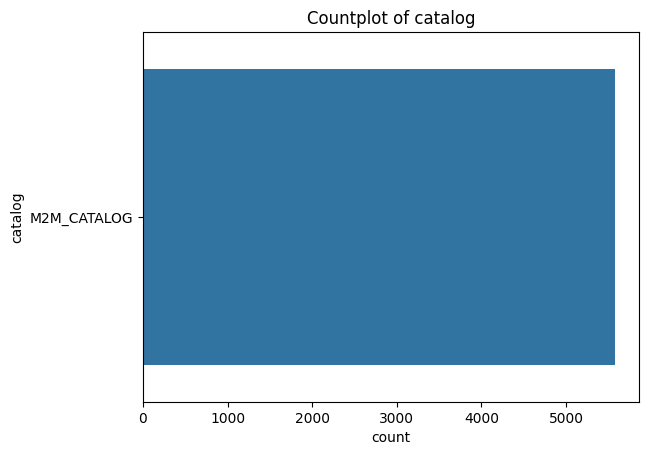

catalog
M2M_CATALOG    5583
Name: count, dtype: int64
-------------------------------------------------------
sourceLocation
           3458
N20E90       11
S20E90        9
S25E80        7
S20W90        7
           ... 
S10W155       1
S45W90        1
S05E75        1
N13E11        1
N15E02        1
Name: count, Length: 1595, dtype: int64
-------------------------------------------------------


KeyboardInterrupt: 

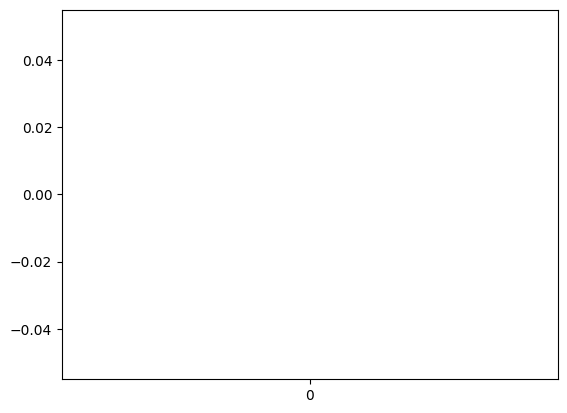

In [38]:
for col in categorical_plt:
    cat_uni(col)

##### Insights